# Controle Industrial
## Analise de envio de agua condensada e tratada


In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv("aguafinal.csv")


In [3]:
dataset.shape

(13104, 7)

In [4]:
dataset.head()

,Chart,Tag Name,Historian Tag Name,TimeStamp,Value,Quality,VALOR
0,Condensado,G200YHN_FT411003,G200YHN_FT411003,Wed May 01 2024 06:10:00 GMT-0300 (HorÃ¡rio Pa...,"2,529,500,008",Good,25.295000
1,Condensado,G200YHN_FT411003,G200YHN_FT411003,Wed May 01 2024 06:20:00 GMT-0300 (HorÃ¡rio Pa...,"2,512,062,454",Good,25.120625
2,Condensado,G200YHN_FT411003,G200YHN_FT411003,Wed May 01 2024 06:30:00 GMT-0300 (HorÃ¡rio Pa...,"2,513,312,531",Good,25.133125
3,Condensado,G200YHN_FT411003,G200YHN_FT411003,Wed May 01 2024 06:40:00 GMT-0300 (HorÃ¡rio Pa...,"2,542,374,992",Good,25.423750
4,Condensado,G200YHN_FT411003,G200YHN_FT411003,Wed May 01 2024 06:50:00 GMT-0300 (HorÃ¡rio Pa...,0.01270833332,Good,NaN


In [5]:
dataset.drop( columns = "Historian Tag Name" , inplace = True)

In [6]:
dataset.drop( columns = "Chart" , inplace = True)
dataset.drop( columns = "Quality" , inplace = True)

dataset.drop( columns = "Value" , inplace = True)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13104 entries, 0 to 13103
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Tag Name   13104 non-null  object 
 1   TimeStamp  13104 non-null  object 
 2   VALOR      10433 non-null  float64
dtypes: float64(1), object(2)
memory usage: 307.3+ KB


In [8]:
dataset.head()


,Tag Name,TimeStamp,VALOR
0,G200YHN_FT411003,Wed May 01 2024 06:10:00 GMT-0300 (HorÃ¡rio Pa...,25.295000
1,G200YHN_FT411003,Wed May 01 2024 06:20:00 GMT-0300 (HorÃ¡rio Pa...,25.120625
2,G200YHN_FT411003,Wed May 01 2024 06:30:00 GMT-0300 (HorÃ¡rio Pa...,25.133125
3,G200YHN_FT411003,Wed May 01 2024 06:40:00 GMT-0300 (HorÃ¡rio Pa...,25.423750
4,G200YHN_FT411003,Wed May 01 2024 06:50:00 GMT-0300 (HorÃ¡rio Pa...,NaN


In [9]:
dataset.groupby('Tag Name').sum()

,TimeStamp,VALOR
Tag Name,,
G200YHN_FT371003,Wed May 01 2024 06:10:00 GMT-0300 (HorÃ¡rio Pa...,381258.750016
G200YHN_FT371004,Wed May 01 2024 06:10:00 GMT-0300 (HorÃ¡rio Pa...,397493.811293
G200YHN_FT411003,Wed May 01 2024 06:10:00 GMT-0300 (HorÃ¡rio Pa...,71002.811840


In [10]:
# Define um dicionário para as substituições
tag_names = {
    "G200YHN_FT371003": "VZ  EFL CX CULTURA PURA",
    "G200YHN_FT371004": "VZ  EFL CX AUTOLISE",
    "G200YHN_FT411003": "VAZAO AGUA BC60-03 COND. INDUSTRIA"
}

# Substitui os valores na coluna "Historian Tag Name"
dataset['Tag Name'] = dataset['Tag Name'].replace(tag_names)

# Imprime o DataFrame para verificar os resultados
print(dataset)


                                 Tag Name  \
0      VAZAO AGUA BC60-03 COND. INDUSTRIA   
1      VAZAO AGUA BC60-03 COND. INDUSTRIA   
2      VAZAO AGUA BC60-03 COND. INDUSTRIA   
3      VAZAO AGUA BC60-03 COND. INDUSTRIA   
4      VAZAO AGUA BC60-03 COND. INDUSTRIA   
...                                   ...   
13099             VZ  EFL CX CULTURA PURA   
13100             VZ  EFL CX CULTURA PURA   
13101             VZ  EFL CX CULTURA PURA   
13102             VZ  EFL CX CULTURA PURA   
13103             VZ  EFL CX CULTURA PURA   

                                               TimeStamp       VALOR  
0      Wed May 01 2024 06:10:00 GMT-0300 (HorÃ¡rio Pa...   25.295000  
1      Wed May 01 2024 06:20:00 GMT-0300 (HorÃ¡rio Pa...   25.120625  
2      Wed May 01 2024 06:30:00 GMT-0300 (HorÃ¡rio Pa...   25.133125  
3      Wed May 01 2024 06:40:00 GMT-0300 (HorÃ¡rio Pa...   25.423750  
4      Wed May 01 2024 06:50:00 GMT-0300 (HorÃ¡rio Pa...         NaN  
...                              

In [11]:
dataset.groupby('Tag Name').sum()


,TimeStamp,VALOR
Tag Name,,
VAZAO AGUA BC60-03 COND. INDUSTRIA,Wed May 01 2024 06:10:00 GMT-0300 (HorÃ¡rio Pa...,71002.811840
VZ EFL CX AUTOLISE,Wed May 01 2024 06:10:00 GMT-0300 (HorÃ¡rio Pa...,397493.811293
VZ EFL CX CULTURA PURA,Wed May 01 2024 06:10:00 GMT-0300 (HorÃ¡rio Pa...,381258.750016


In [12]:
dataset.isna().sum()


Tag Name        0
TimeStamp       0
VALOR        2671
dtype: int64

In [13]:
def func_calc_percentual_valores_ausentes(df):

    # Calcula o total de células no dataset
    totalCells = np.prod(df.shape)

    # Conta o número de valores ausentes por coluna
    missingCount = df.isnull().sum()

    # Calcula o total de valores ausentes
    totalMissing = missingCount.sum()

    # Calcula o percentual de valores ausentes
    print("O dataset tem", round(((totalMissing/totalCells) * 100), 2), "%", "de valores ausentes.")

In [14]:
func_calc_percentual_valores_ausentes(dataset)

O dataset tem 6.79 % de valores ausentes.


In [15]:
def drop_rows_with_missing_values(df):
    old = df.shape[0]
    df.dropna(inplace = True)
    new = df.shape[0]
    count = old - new
    print(f"{count} linhas contendo valores ausentes foram descartadas.")

In [16]:
drop_rows_with_missing_values(dataset)

2671 linhas contendo valores ausentes foram descartadas.


In [17]:
dataset.groupby('Tag Name').describe()


VALOR                          \
                                     count        mean         std   
Tag Name                                                             
VAZAO AGUA BC60-03 COND. INDUSTRIA  2957.0   24.011773    8.361689   
VZ  EFL CX AUTOLISE                 3238.0  122.759052   59.249915   
VZ  EFL CX CULTURA PURA             4238.0   89.961951  101.799298   

                                                                          \
                                             min         25%         50%   
Tag Name                                                                   
VAZAO AGUA BC60-03 COND. INDUSTRIA  2.400000e-07   24.362917   24.863958   
VZ  EFL CX AUTOLISE                 0.000000e+00  108.632847  144.209781   
VZ  EFL CX CULTURA PURA             0.000000e+00    0.000000   19.706500   

                                                            
                                           75%         max  
Tag Name                                                    
VAZAO AGUA BC60-03 COND. INDUSTRIA   25.426043   96.031246  
VZ  EFL CX AUTOLISE                 162.152970  201.169779  
VZ  EFL CX CULTURA PURA             192.267474  278.818056

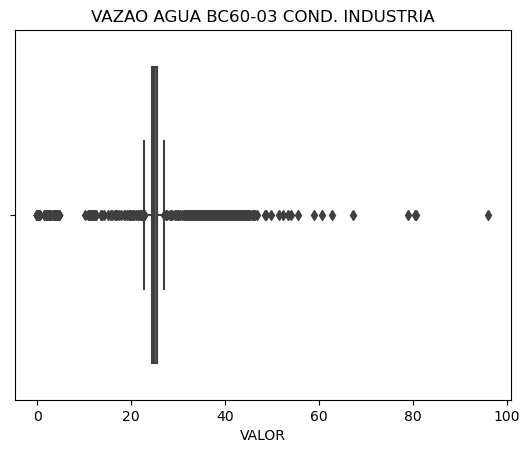

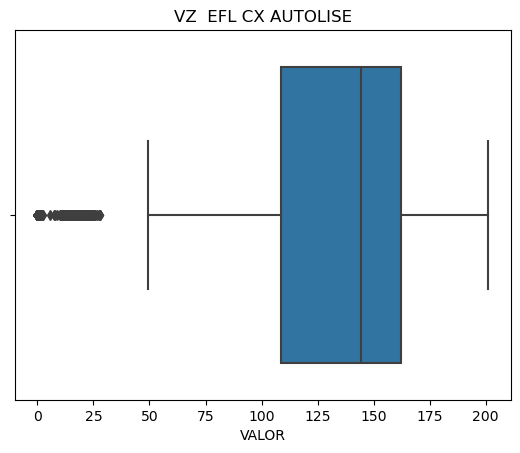

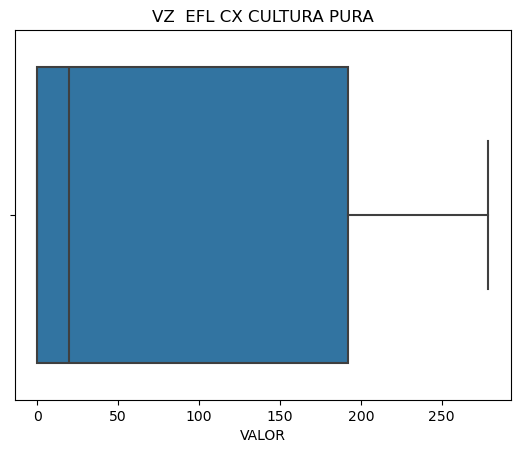

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que 'dataset' é o seu DataFrame

# Obtenha os valores únicos na coluna 'Historian Tag Name'
tags = dataset['Tag Name'].unique()

# Crie um boxplot para cada valor único
for tag in tags:
    # Filtra o DataFrame para a tag atual
    df_filtered = dataset[dataset['Tag Name'] == tag]
    
    # Crie um boxplot para a coluna 'Value' do DataFrame filtrado
    sns.boxplot(x='VALOR', data=df_filtered)
    
    # Defina o título do boxplot para a tag atual
    plt.title(tag)
    
    # Mostre o gráfico
    plt.show()


In [19]:

dataset = dataset[~((dataset['Tag Name'] == 'VAZAO AGUA BC60-03 COND. INDUSTRIA') & (dataset['VALOR'] < 1.416667e-10))]
dataset = dataset[~((dataset['Tag Name'] == 'VZ EFL CX AUTOLISE') & (dataset['VALOR'] < 1.194956e+02))]
dataset = dataset[~((dataset['Tag Name'] == 'VZ EFL CX CULTURA PURA') & (dataset['VALOR'] < 1.751225e+01))]


In [20]:
dataset.groupby('Tag Name').describe()

VALOR                          \
                                     count        mean         std   
Tag Name                                                             
VAZAO AGUA BC60-03 COND. INDUSTRIA  2957.0   24.011773    8.361689   
VZ  EFL CX AUTOLISE                 3238.0  122.759052   59.249915   
VZ  EFL CX CULTURA PURA             4238.0   89.961951  101.799298   

                                                                          \
                                             min         25%         50%   
Tag Name                                                                   
VAZAO AGUA BC60-03 COND. INDUSTRIA  2.400000e-07   24.362917   24.863958   
VZ  EFL CX AUTOLISE                 0.000000e+00  108.632847  144.209781   
VZ  EFL CX CULTURA PURA             0.000000e+00    0.000000   19.706500   

                                                            
                                           75%         max  
Tag Name                                                    
VAZAO AGUA BC60-03 COND. INDUSTRIA   25.426043   96.031246  
VZ  EFL CX AUTOLISE                 162.152970  201.169779  
VZ  EFL CX CULTURA PURA             192.267474  278.818056

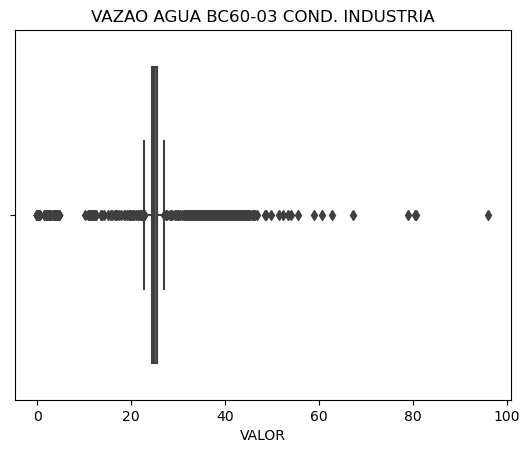

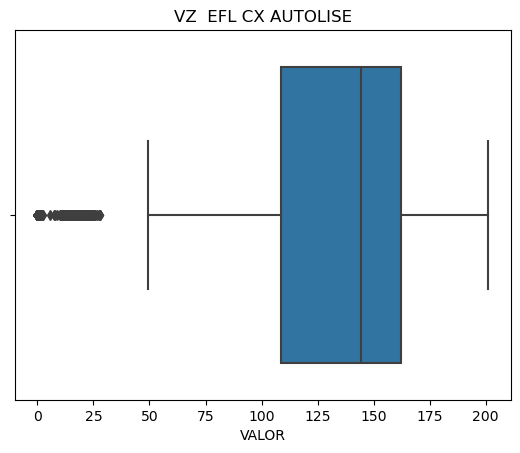

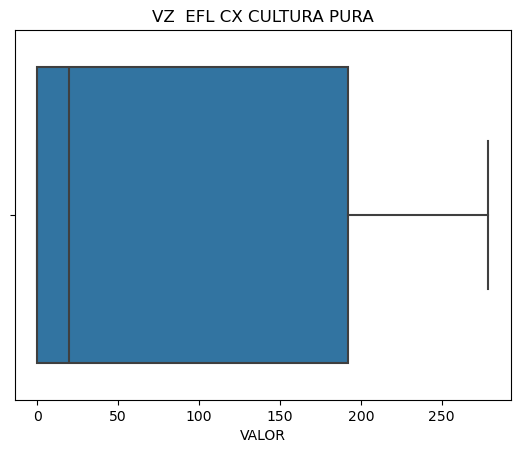

In [21]:


# Supondo que 'dataset' é o seu DataFrame

# Obtenha os valores únicos na coluna 'Historian Tag Name'
tags = dataset['Tag Name'].unique()

# Crie um boxplot para cada valor único
for tag in tags:
    # Filtra o DataFrame para a tag atual
    df_filtered = dataset[dataset['Tag Name'] == tag]
    
    # Crie um boxplot para a coluna 'Value' do DataFrame filtrado
    sns.boxplot(x='VALOR', data=df_filtered)
    
    # Defina o título do boxplot para a tag atual
    plt.title(tag)
    
    # Mostre o gráfico
    plt.show()

In [22]:
dataset = dataset[~((dataset['Tag Name'] == 'VAZAO AGUA BC60-03 COND. INDUSTRIA') & (dataset['VALOR'] > 35.453646))]


In [23]:
dataset.groupby('Tag Name').describe()

VALOR                          \
                                     count        mean         std   
Tag Name                                                             
VAZAO AGUA BC60-03 COND. INDUSTRIA  2787.0   22.891882    6.943862   
VZ  EFL CX AUTOLISE                 3238.0  122.759052   59.249915   
VZ  EFL CX CULTURA PURA             4238.0   89.961951  101.799298   

                                                                          \
                                             min         25%         50%   
Tag Name                                                                   
VAZAO AGUA BC60-03 COND. INDUSTRIA  2.400000e-07   24.321875   24.820625   
VZ  EFL CX AUTOLISE                 0.000000e+00  108.632847  144.209781   
VZ  EFL CX CULTURA PURA             0.000000e+00    0.000000   19.706500   

                                                            
                                           75%         max  
Tag Name                                                    
VAZAO AGUA BC60-03 COND. INDUSTRIA   25.278125   35.445833  
VZ  EFL CX AUTOLISE                 162.152970  201.169779  
VZ  EFL CX CULTURA PURA             192.267474  278.818056

In [24]:
dataset.head()

,Tag Name,TimeStamp,VALOR
0,VAZAO AGUA BC60-03 COND. INDUSTRIA,Wed May 01 2024 06:10:00 GMT-0300 (HorÃ¡rio Pa...,25.295000
1,VAZAO AGUA BC60-03 COND. INDUSTRIA,Wed May 01 2024 06:20:00 GMT-0300 (HorÃ¡rio Pa...,25.120625
2,VAZAO AGUA BC60-03 COND. INDUSTRIA,Wed May 01 2024 06:30:00 GMT-0300 (HorÃ¡rio Pa...,25.133125
3,VAZAO AGUA BC60-03 COND. INDUSTRIA,Wed May 01 2024 06:40:00 GMT-0300 (HorÃ¡rio Pa...,25.423750
6,VAZAO AGUA BC60-03 COND. INDUSTRIA,Wed May 01 2024 07:10:00 GMT-0300 (HorÃ¡rio Pa...,25.230625


In [25]:
dataset['TimeStamp'] = dataset['TimeStamp'].str.split(' GMT').str[0]

In [26]:
dataset.head()

,Tag Name,TimeStamp,VALOR
0,VAZAO AGUA BC60-03 COND. INDUSTRIA,Wed May 01 2024 06:10:00,25.295000
1,VAZAO AGUA BC60-03 COND. INDUSTRIA,Wed May 01 2024 06:20:00,25.120625
2,VAZAO AGUA BC60-03 COND. INDUSTRIA,Wed May 01 2024 06:30:00,25.133125
3,VAZAO AGUA BC60-03 COND. INDUSTRIA,Wed May 01 2024 06:40:00,25.423750
6,VAZAO AGUA BC60-03 COND. INDUSTRIA,Wed May 01 2024 07:10:00,25.230625


In [27]:
dataset['TimeStamp'] = pd.to_datetime(dataset['TimeStamp'], format='%a %b %d %Y %H:%M:%S')


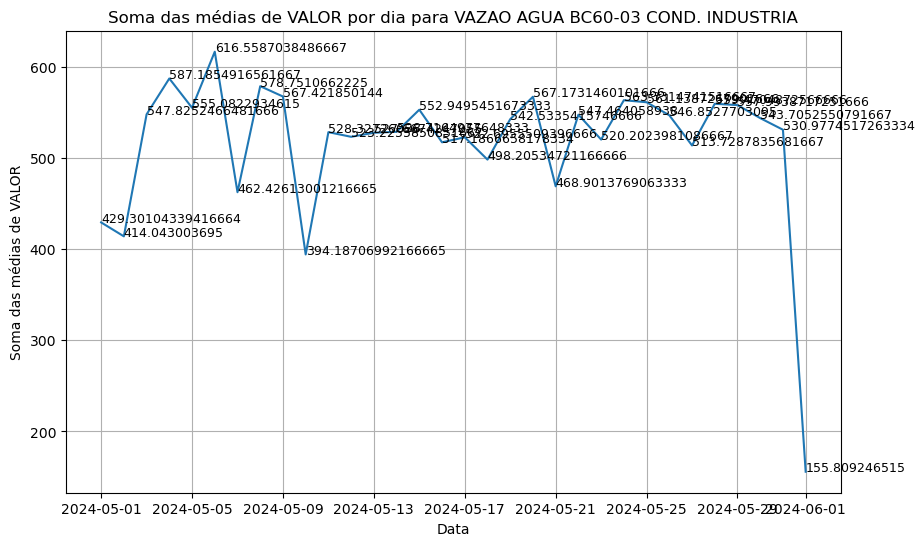

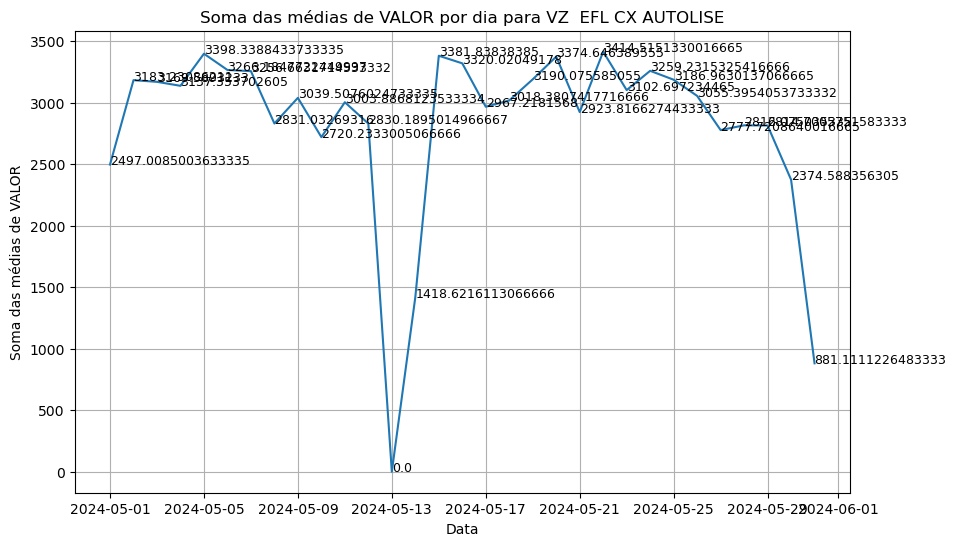

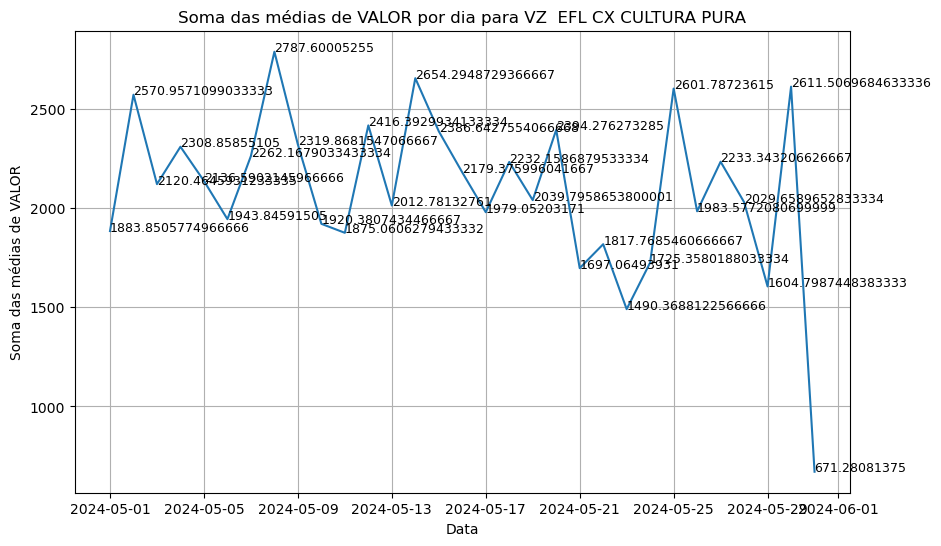

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que 'dataset' é o seu DataFrame original
# dataset = pd.read_csv('seu_arquivo.csv')  # substitua 'seu_arquivo.csv' pelo nome do seu arquivo csv

# Converter a coluna 'TimeStamp' para datetime
dataset['TimeStamp'] = pd.to_datetime(dataset['TimeStamp'])

# Definir 'TimeStamp' como o índice do DataFrame
dataset.set_index('TimeStamp', inplace=True)

# Resample 'VALOR' por hora e 'Tag Name', e calcular a média dos valores
dataset_resampled = dataset.groupby('Tag Name').resample('H')['VALOR'].mean()

# Resetar o índice do DataFrame
dataset_resampled = dataset_resampled.reset_index()

# Resample 'VALOR' por dia e 'Tag Name', e somar as médias
dataset_resampled.set_index('TimeStamp', inplace=True)
dataset_resampled = dataset_resampled.groupby('Tag Name').resample('D')['VALOR'].sum()
dataset_resampled = dataset_resampled.reset_index()

# Obter a lista de tag names únicos
tag_names = dataset_resampled['Tag Name'].unique()

# Para cada tag name, plotar um gráfico da soma das médias de 'VALOR' por dia
for tag_name in tag_names:
    df_tag = dataset_resampled[dataset_resampled['Tag Name'] == tag_name]
    plt.figure(figsize=(10, 6))
    plt.plot(df_tag['TimeStamp'], df_tag['VALOR'])
    plt.title(f'Soma das médias de VALOR por dia para {tag_name}')
    plt.xlabel('Data')
    plt.ylabel('Soma das médias de VALOR')
    plt.grid(True)
    
    # Adicionar rótulos de dados
    for x, y in zip(df_tag['TimeStamp'], df_tag['VALOR']):
        plt.text(x, y, str(y),fontsize=9)
    
    plt.show()


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Resample 'VALOR' por hora e 'Tag Name', e calcular a média dos valores
dataset_resampled = dataset.groupby('Tag Name').resample('H')['VALOR'].mean()

# Resetar o índice do DataFrame
dataset_resampled = dataset_resampled.reset_index()

# Resample 'VALOR' por mês e 'Tag Name', e somar as médias
dataset_resampled.set_index('TimeStamp', inplace=True)
dataset_resampled = dataset_resampled.groupby('Tag Name').resample('M')['VALOR'].sum()
dataset_resampled = dataset_resampled.reset_index()

# Agora, 'dataset_resampled' contém a soma das médias de 'VALOR' por mês para cada 'Tag Name'
print(dataset_resampled)

# Salvar o DataFrame como um arquivo PDF
with PdfPages('output.pdf') as pdf:
    dataset_resampled.to_string(index=False)
    pdf.savefig()

print("A tabela foi salva com sucesso no arquivo output.pdf.")


                             Tag Name  TimeStamp         VALOR
0  VAZAO AGUA BC60-03 COND. INDUSTRIA 2024-05-31  16375.229118
1  VAZAO AGUA BC60-03 COND. INDUSTRIA 2024-06-30    155.809247
2                 VZ  EFL CX AUTOLISE 2024-05-31  87610.835346
3             VZ  EFL CX CULTURA PURA 2024-05-31  64890.928707


C:\Users\barbosa_go\AppData\Local\Temp\ipykernel_10880\178086336.py:20: MatplotlibDeprecationWarning: Keeping empty pdf files is deprecated since 3.8 and support will be removed two minor releases later.
  with PdfPages('output.pdf') as pdf:


ValueError: No figure None